Project 1
------------

Business Understanding
----------------------

This dataset was provided by Airbnb, a peer to peer online accommodations marketplace, as a competition on Kaggle.  Specifically, Airbnb provided information about new users in an effort to predict where the new user would make their first booking.  At a high-level, this data is fascinating because it provides a real-world example of user information that is gathered by an online retailer.  As a casual user of the site, the gravity of the level of information being collected may not be realized.  An even farther reach is understanding how that data could be used by the retailer.   

For this project, the purpose of the provided user information is to predict which country will be the user's first booking.  The data collected included demographic data, marketing channels, browser and session details.  This information is likely used by Airbnb to characterize market user categories and to create direct marketing campaigns targeted to the predicted country of booking.

A good prediction algorithm would identify what dependent variables of the dataset contribute the greatest to establishing a high correlation to the country of first booking.

Data Understanding
------------------

A description of all data elements was provided as part of the Kaggle competition here:  https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/
And is also duplicated below:
    
* id: user id
* date_account_created: the date of account creation
* timestamp_first_active: timestamp of the first activity, note that it can be earlier than date_account_created or date_first_booking because a user can search before signing up
* date_first_booking: date of first booking
* gender
* age
* signup_method
* signup_flow: the page a user came to signup up from
* language: international language preference
* affiliate_channel: what kind of paid marketing
* affiliate_provider: where the marketing is e.g. google, craigslist, other
* first_affiliate_tracked: whats the first marketing the user interacted with before the signing up
* signup_app
* first_device_type
* first_browser
* country_destination: this is the target variable you are to predict
* session action
* session action_type
* session action_detail
* session device_type
* session secs_elapsed

In [13]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

In [11]:
air=pd.read_csv('C:\\Users\\Jainy\\Documents\\DataMining\\Data\\train.csv')

In [14]:
for col in air:
    print(col + " missing values: " + str(np.count_nonzero(air[col].isnull())) + " which is " + 
          str(round((np.count_nonzero(air[col].isnull())/(len(air)*1.0))*100,2))+"% of the Total \n")

id missing values: 0 which is 0.0% of the Total 

date_account_created missing values: 0 which is 0.0% of the Total 

timestamp_first_active missing values: 0 which is 0.0% of the Total 

date_first_booking missing values: 124543 which is 58.35% of the Total 

gender missing values: 0 which is 0.0% of the Total 

age missing values: 87990 which is 41.22% of the Total 

signup_method missing values: 0 which is 0.0% of the Total 

signup_flow missing values: 0 which is 0.0% of the Total 

language missing values: 0 which is 0.0% of the Total 

affiliate_channel missing values: 0 which is 0.0% of the Total 

affiliate_provider missing values: 0 which is 0.0% of the Total 

first_affiliate_tracked missing values: 6065 which is 2.84% of the Total 

signup_app missing values: 0 which is 0.0% of the Total 

first_device_type missing values: 0 which is 0.0% of the Total 

first_browser missing values: 0 which is 0.0% of the Total 

country_destination missing values: 0 which is 0.0% of the Tot

In [17]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null float64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(2), int64(1), object(13)
memory usage: 26.1+ MB


In [18]:
categorical_features = ['gender', 'signup_method', 'signup_flow','language', 'affiliate_channel','affiliate_provider',
                        'first_affiliate_tracked','signup_app','first_device_type','first_browser','country_destination']

In [20]:
for categorical_feature in categorical_features:
    air[categorical_feature] = air[categorical_feature].astype('category')

In [21]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null float64
date_first_booking         88908 non-null object
gender                     213451 non-null category
age                        125461 non-null float64
signup_method              213451 non-null category
signup_flow                213451 non-null category
language                   213451 non-null category
affiliate_channel          213451 non-null category
affiliate_provider         213451 non-null category
first_affiliate_tracked    207386 non-null category
signup_app                 213451 non-null category
first_device_type          213451 non-null category
first_browser              213451 non-null category
country_destination        213451 non-null category
dtypes: category(11), float64(2), object(3)
memory usage: 10.4+ MB

In [22]:
air['date_account_created'] = pd.to_datetime(air['date_account_created'])

In [23]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null datetime64[ns]
timestamp_first_active     213451 non-null float64
date_first_booking         88908 non-null object
gender                     213451 non-null category
age                        125461 non-null float64
signup_method              213451 non-null category
signup_flow                213451 non-null category
language                   213451 non-null category
affiliate_channel          213451 non-null category
affiliate_provider         213451 non-null category
first_affiliate_tracked    207386 non-null category
signup_app                 213451 non-null category
first_device_type          213451 non-null category
first_browser              213451 non-null category
country_destination        213451 non-null category
dtypes: category(11), datetime64[ns](1), float64(2), objec

In [24]:
air['date_first_booking'] = pd.to_datetime(air['date_first_booking'])

In [30]:
air['date_first_active'] = pd.to_datetime((air.timestamp_first_active//1000000),infer_datetime_format=True)

In [27]:
air.info()
air.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 17 columns):
id                         213451 non-null object
date_account_created       213451 non-null datetime64[ns]
timestamp_first_active     213451 non-null float64
date_first_booking         88908 non-null datetime64[ns]
gender                     213451 non-null category
age                        125461 non-null float64
signup_method              213451 non-null category
signup_flow                213451 non-null category
language                   213451 non-null category
affiliate_channel          213451 non-null category
affiliate_provider         213451 non-null category
first_affiliate_tracked    207386 non-null category
signup_app                 213451 non-null category
first_device_type          213451 non-null category
first_browser              213451 non-null category
country_destination        213451 non-null category
date_first_active          213451 non-null datetim

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,date_first_active
0,gxn3p5htnn,2010-06-28,2.009030e+13,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,1970-01-01 00:00:00.020090300
1,820tgsjxq7,2011-05-25,2.009050e+13,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,1970-01-01 00:00:00.020090500
2,4ft3gnwmtx,2010-09-28,2.009060e+13,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,1970-01-01 00:00:00.020090600
3,bjjt8pjhuk,2011-12-05,2.009100e+13,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,1970-01-01 00:00:00.020091000
4,87mebub9p4,2010-09-14,2.009120e+13,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,1970-01-01 00:00:00.020091200


In [89]:
air.gender.replace('-unknown-',np.nan,inplace=True)

In [38]:
for col in air:
    print (col + ": " + str(round((np.count_nonzero(air[col].isnull())/(len(air)*1.0))*100,2)))

id: 0.0
date_account_created: 0.0
timestamp_first_active: 0.0
date_first_booking: 58.35
gender: 44.83
age: 41.22
signup_method: 0.0
signup_flow: 0.0
language: 0.0
affiliate_channel: 0.0
affiliate_provider: 0.0
first_affiliate_tracked: 2.84
signup_app: 0.0
first_device_type: 0.0
first_browser: 0.0
country_destination: 0.0
date_first_active: 0.0


In [50]:
air.describe()

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,timestamp_first_active,age
count,2.134510e+05,125461.000000
mean,2.013083e+13,49.668335
std,9.253690e+09,155.666612
min,2.009030e+13,1.000000
25%,2.012120e+13,NaN
50%,2.013090e+13,NaN
75%,2.014030e+13,NaN
max,2.014060e+13,2014.000000


In [55]:
air.age.describe()

count    213451.000000
mean         43.209444
std         119.592797
min           1.000000
25%          32.000000
50%          34.000000
75%          36.000000
max        2014.000000
Name: age, dtype: float64

In [71]:
air[air.age<18]['age'].describe()

count    158.000000
mean      12.202532
std        5.916359
min        1.000000
25%        5.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: age, dtype: float64

In [72]:
air[air.age>120]['age'].describe()

count     781.000000
mean     2006.308579
std        95.711349
min       132.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

In [56]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

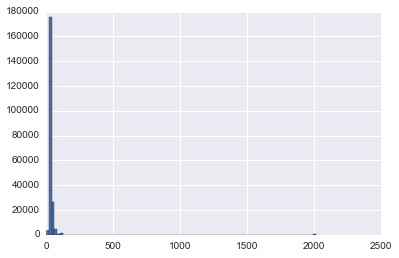

In [63]:
air.age.hist(bins=100)

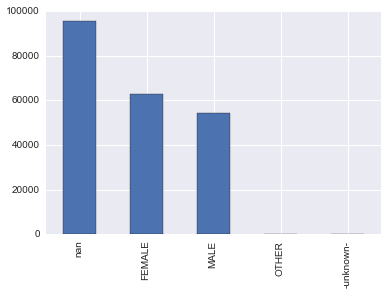

In [90]:
air.gender.value_counts(dropna=False).plot(kind='bar')

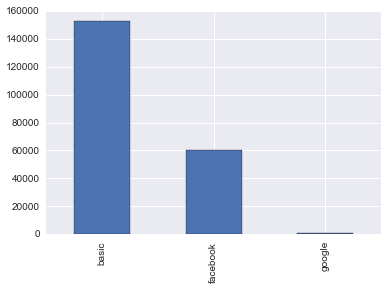

In [78]:
air.signup_method.value_counts(dropna=False).plot(kind='bar')

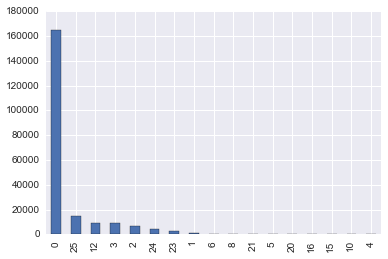

In [81]:
air.signup_flow.value_counts(dropna=False).plot(kind='bar')

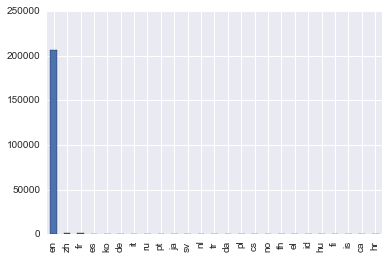

In [82]:
air.language.value_counts(dropna=False).plot(kind='bar')

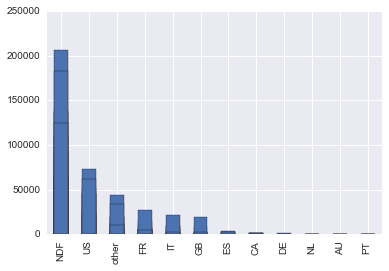

In [80]:
air.country_destination.value_counts(dropna=False).plot(kind='bar')

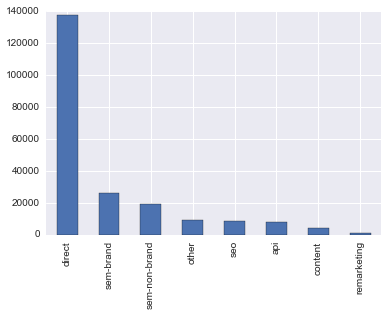

In [83]:
air.affiliate_channel.value_counts(dropna=False).plot(kind='bar')

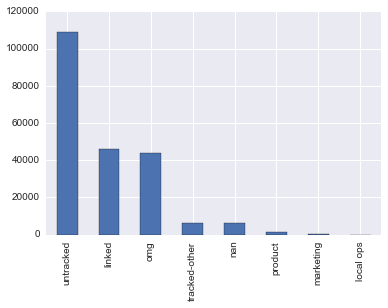

In [84]:
air.first_affiliate_tracked.value_counts(dropna=False).plot(kind='bar')

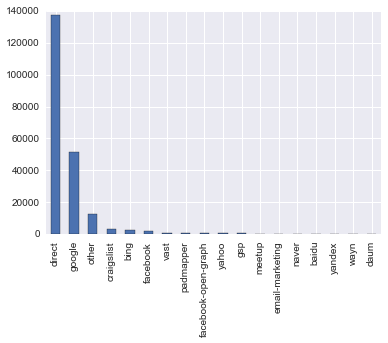

In [85]:
air.affiliate_provider.value_counts(dropna=False).plot(kind='bar')

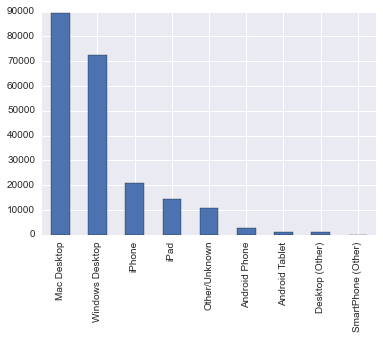

In [86]:
air.first_device_type.value_counts(dropna=False).plot(kind='bar')

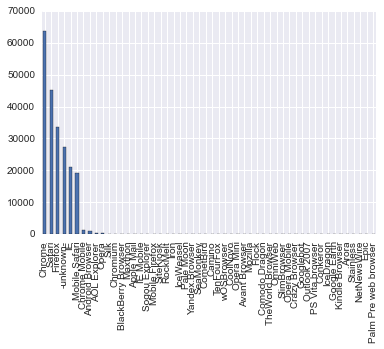

In [87]:
air.first_browser.value_counts(dropna=False).plot(kind='bar')